In [1]:
%matplotlib notebook
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset= load_digits()
X,y= dataset.data,dataset.target

In [2]:
# Creating imbalanced 
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y!=1]=0
np.bincount(y_binary_imbalanced)

array([1615,  182], dtype=int64)

In [3]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
clf = SVC(kernel='rbf',C=1).fit(X_train,y_train)
print('Train accuracy {}'.format(clf.score(X_train,y_train)))
print('Test accuracy {}'.format(clf.score(X_test,y_test)))
      

Train accuracy 1.0
Test accuracy 0.9088888888888889


# Dummy Classifier

In [4]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
print('Train accuracy {}'.format(dummy_clf.score(X_train,y_train)))
print('Test accuracy {}'.format(dummy_clf.score(X_test,y_test)))
dummy_clf.predict(X_test)

Train accuracy 0.896807720861173
Test accuracy 0.9044444444444445


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [5]:
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
print('Train accuracy {}'.format(clf.score(X_train,y_train)))
print('Test accuracy {}'.format(clf.score(X_test,y_test)))

Train accuracy 1.0
Test accuracy 0.9777777777777777


# Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix
dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
y_predicted  = dummy_clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[407   0]
 [ 43   0]]


In [7]:
from sklearn.metrics import confusion_matrix
dummy_clf = DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_predicted  = dummy_clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[367  40]
 [ 35   8]]


In [8]:
svm = SVC(kernel='linear').fit(X_train,y_train)
y_predicted  = svm.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[402   5]
 [  5  38]]


In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_predicted  = clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[401   6]
 [  6  37]]


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
y_predicted  = dt.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[400   7]
 [ 17  26]]


# Evaluation metric for binary classifier

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy : {}'.format(accuracy_score(y_test,y_predicted)))
print('Precision : {}'.format(precision_score(y_test,y_predicted)))
print('Recall : {}'.format(recall_score(y_test,y_predicted)))
print('f1_score : {}'.format(f1_score(y_test,y_predicted)))

Accuracy : 0.9466666666666667
Precision : 0.7878787878787878
Recall : 0.6046511627906976
f1_score : 0.6842105263157895


In [12]:
# combined report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



# Decision functions

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
y_scores_lr = LogisticRegression().fit(X_train,y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list[:20]

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.722500473360618),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.7493459511792651),
 (1, 5.2349002124953099),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
y_scores_lr = LogisticRegression().fit(X_train,y_train).predict_proba(X_test)
y_score_list =list(zip(y_test,y_scores_lr[:,1]))
y_score_list[:20]

[(0, 8.6010872706740499e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.6837934145133791e-09),
 (0, 5.8329401240781557e-05),
 (1, 0.99470087426871634),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.5698002448420801e-10),
 (0, 1.9920533537070619e-05),
 (0, 6.706507243234968e-06),
 (0, 1.7046194538057202e-05),
 (1, 0.99998640569605668),
 (0, 9.8535912965519826e-13),
 (0, 2.6009374594983658e-06),
 (0, 5.9442892596185542e-12)]

# Precision - recall curves


<IPython.core.display.Javascript object>


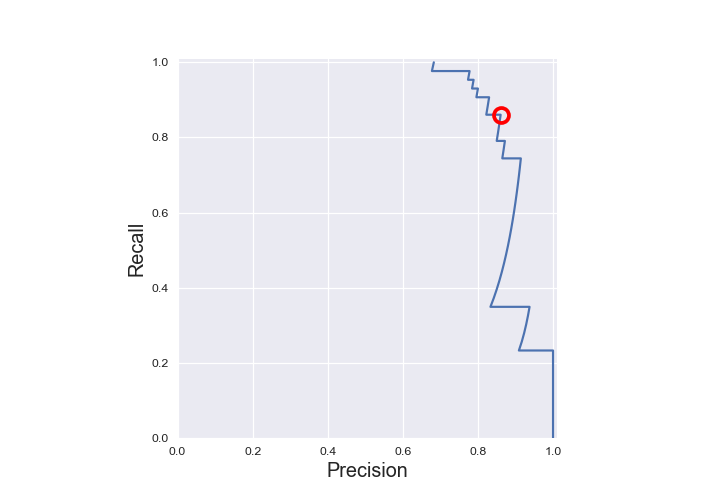

In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()


# ROC curve 

<IPython.core.display.Javascript object>


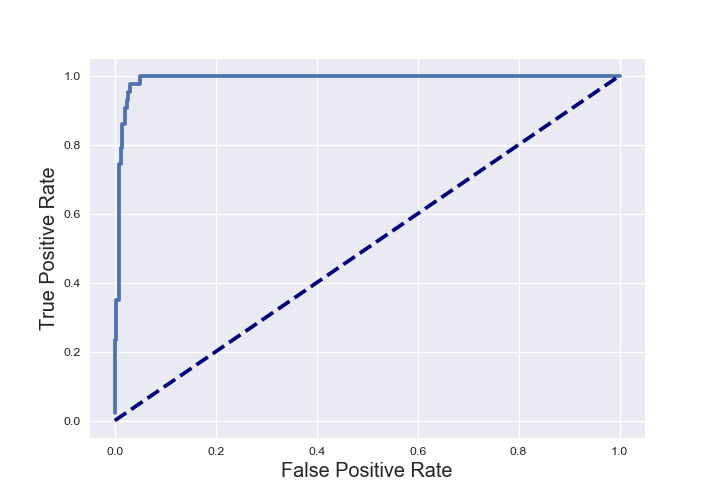

In [20]:
from sklearn.metrics import roc_curve,auc
X_train,X_test ,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)

y_score_lr = LogisticRegression().fit(X_train,y_train).decision_function(X_test)
fpr_lr,tpr_lr,_ = roc_curve(y_test,y_score_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)
plt.figure()
plt.plot(fpr_lr,tpr_lr,lw=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

<IPython.core.display.Javascript object>


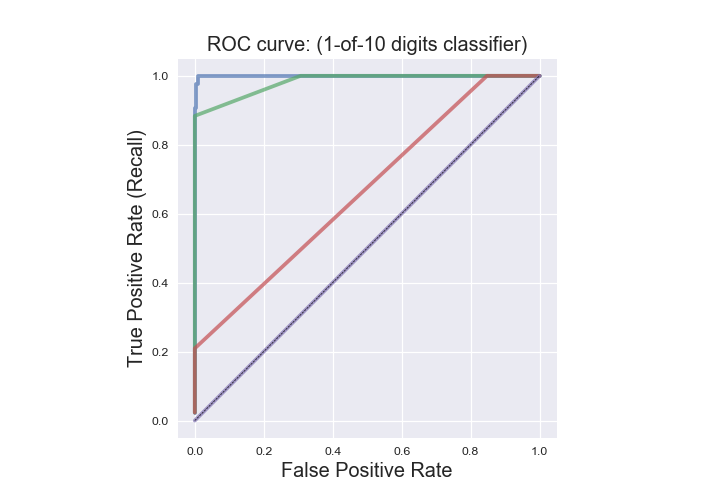

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)

plt.figure()
for g in [0.01, 0.1, 0.2,1]:
    svm = SVC(gamma=g).fit(X_train,y_train)
    y_score_svm =svm.decision_function(X_test)
    fpr_svm,tpr_svm ,_= roc_curve(y_test,y_score_svm)
    roc_auc_svm = auc(fpr_svm,tpr_svm)
    accuracy_svm= svm.score(X_test,y_test)
    plt.plot(fpr_svm,tpr_svm,lw=3,alpha=0.7)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

## Multi Class evaluation metrics

<IPython.core.display.Javascript object>


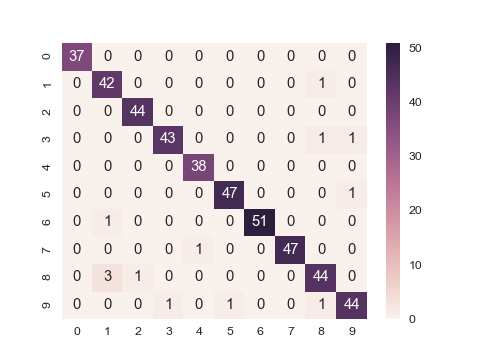

<IPython.core.display.Javascript object>


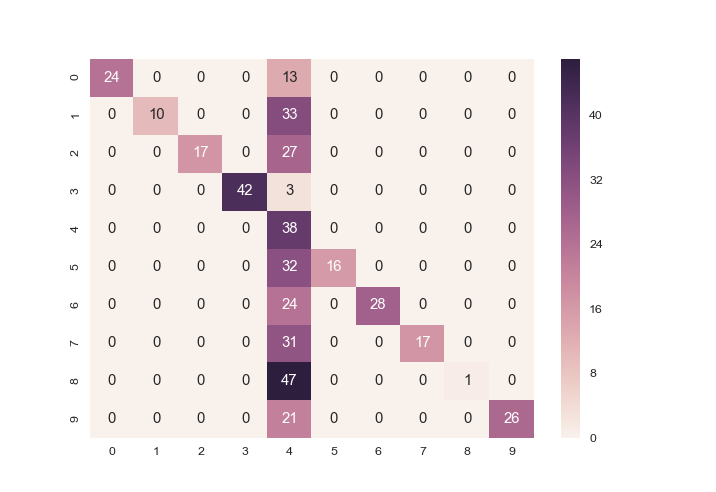

In [69]:
dataset = load_digits()
X,y= dataset.data,dataset.target
X_train_mc,X_test_mc,y_train_mc,y_test_mc  = train_test_split(X,y,random_state=0)

svm = SVC(kernel = 'linear').fit(X_train_mc,y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)

confusion_mc= confusion_matrix(y_test_mc,svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc,[0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)

svm = SVC(kernel='rbf').fit(X_train_mc,y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc,svm_predicted_mc)

df_cm= pd.DataFrame(confusion_mc,[0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9])
plt.figure()
sns.heatmap(df_cm,annot=True)

In [71]:
print(classification_report(y_test_mc,svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



## Macro vs Micro averaged metrics

In [76]:
print('Class instances equal Precision:{}'.format(precision_score(y_test_mc,svm_predicted_mc,average='micro')))
print('Class  equal Precision:{}'.format(precision_score(y_test_mc,svm_predicted_mc,average='macro')))

Class instances equal :0.4866666666666667
Class  equal :0.9141263940520445


In [77]:
print('Class instances equal  F1_score:{}'.format(f1_score(y_test_mc,svm_predicted_mc,average='micro')))
print('Class  equal F1_score :{}'.format(f1_score(y_test_mc,svm_predicted_mc,average='macro')))

Class instances equal  F1_score:0.4866666666666667
Class  equal F1_score :0.5410917047015468


# Regression evaluation metrics

Linear Model mean squared error: 4646.740446731375
Dummy Model mean squared error : 4965.126471649221
Linear Model r2_score: 0.06399006639614913
Dummy Model r2_score : -0.00014359578276068596


<IPython.core.display.Javascript object>


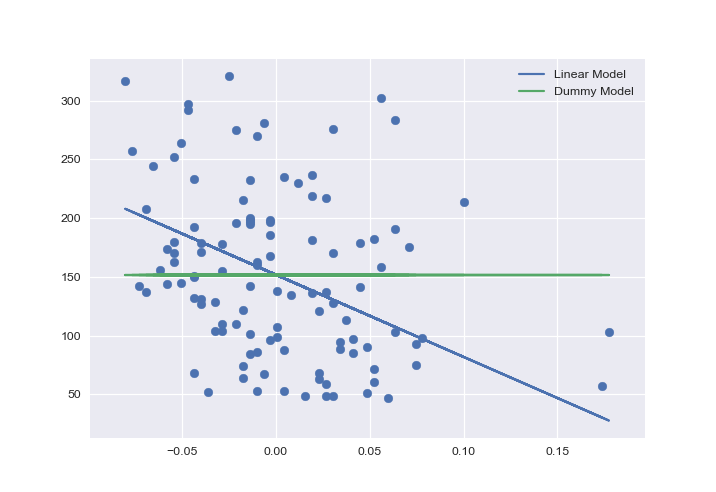

In [143]:
from sklearn.dummy import DummyRegressor
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
diabetes =  datasets.load_diabetes()
X= diabetes.data[:,None,6]
y= diabetes.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lm =LinearRegression().fit(X_train,y_train)
lm_dummy_mean = DummyRegressor(strategy='mean').fit(X_train,y_train)

y_predict= lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
print('Linear Model mean squared error: {}'.format(mean_squared_error(y_test,y_predict)))
print('Dummy Model mean squared error : {}'.format(mean_squared_error(y_test,y_predict_dummy_mean)))
print('Linear Model r2_score: {}'.format(r2_score(y_test,y_predict)))
print('Dummy Model r2_score : {}'.format(r2_score(y_test,y_predict_dummy_mean)))

plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,label='Linear Model')
plt.plot(X_test,y_predict_dummy_mean,label='Dummy Model')
plt.legend();

In [117]:
from sklearn.model_selection import cross_val_score
dataset = load_digits()
X,y = dataset.data,dataset.target==1
clf =SVC(kernel='linear',C=1)
print('Cross Val Accuracy {}'.format(cross_val_score(clf,X,y,cv=5)))
print('Cross Val roc_auc {}'.format(cross_val_score(clf,X,y,cv=5,scoring='roc_auc')))
print('Cross Val recall {}'.format(cross_val_score(clf,X,y,cv=5,scoring='recall')))

Cross Val Accuracy [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross Val roc_auc [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross Val recall [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


## Grid_Search

In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


## Optimizing a classifier

In [142]:
from adspy_shared_utilities import  plot_class_regions_for_classifier_subplot

dataset = load_digits()
X,y = dataset.data,dataset.target==1

X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=0)
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear').fit(X_twovar_train,y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure
for i, eval_metric in enumerate(('precision','recall','f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf,param_grid=grid_values,scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train,y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    plt.title(eval_metric)


Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5575585072738772
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.935661321592438
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5052650685685419
Grid best parameter (max. roc_auc): {'class_weight': {1: 5}}
Grid best score (roc_auc): 0.8895543535345842
